<a href="https://colab.research.google.com/github/rehmanessanidev/HandwritingRecognitionAI/blob/main/CNN_AND_VGG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Handwritten Digits and Letters Recognition with Convolutional Neural Network (CNN)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import cv2
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow
import tensorflow_datasets as tfds
from skimage import filters

In [ ]:
emnist_train_dataset, emnist_info = tfds.load("emnist/byclass", split="train", with_info=True)

# Load EMNIST ByClass dataset for testing
emnist_test_dataset = tfds.load("emnist/byclass", split="test")

# Function to convert dataset to DataFrame
def dataset_to_dataframe(dataset):
    data = []
    for example in dataset:
        image = example["image"].numpy().reshape((28, 28))
        label = example["label"].numpy()
        data.append({"image": image, "label": label})
    return pd.DataFrame(data)

# Convert datasets to DataFrames
train_df = dataset_to_dataframe(emnist_train_dataset)
test_df = dataset_to_dataframe(emnist_test_dataset)

# Display information about the datasets
print("EMNIST Train DataFrame:")
print(train_df.head())

print("\nEMNIST Test DataFrame:")
print(test_df.head())

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/697932 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/emnist/byclass/3.0.0.incompleteKOBQLU/emnist-train.tfrecord*...:   0%|    …

Generating test examples...:   0%|          | 0/116323 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/emnist/byclass/3.0.0.incompleteKOBQLU/emnist-test.tfrecord*...:   0%|     …

Dataset emnist downloaded and prepared to /root/tensorflow_datasets/emnist/byclass/3.0.0. Subsequent calls will reuse this data.
EMNIST Train DataFrame:
                                               image  label
0  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...      5
1  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...      9
2  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...     14
3  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...      8
4  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...      8

EMNIST Test DataFrame:
                                               image  label
0  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...     24
1  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...      2
2  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...      3
3  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...      3
4  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...     56


In [ ]:
#SHARPENING IMAGES IN TESTING AND TRAINING DATASETS

def apply_unsharp_mask_to_dataframe(df):
    def apply_unsharp_mask(image):
        return filters.unsharp_mask(image, radius=1, amount=1)

    # Apply unsharp mask to all images in the DataFrame
    df['sharpened_image'] = df['image'].apply(apply_unsharp_mask)

    return df
traindf = apply_unsharp_mask_to_dataframe(train_df)
testdf = apply_unsharp_mask_to_dataframe(test_df)

24


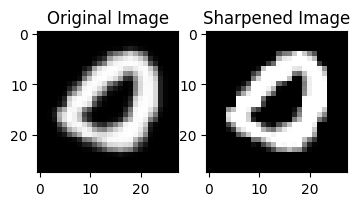

2


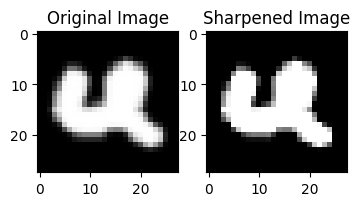

3


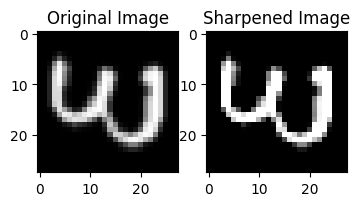

3


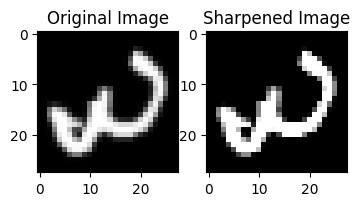

56


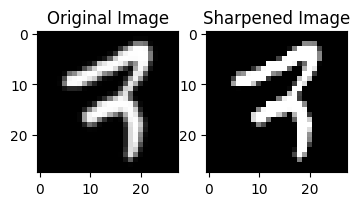

In [ ]:
for i in range(5):  # Display the first 5 examples to demonstrate results of filtering Testing Dataset
    original_image = test_df["image"][i]
    sharpened_image = testdf["sharpened_image"][i]
    print(test_df["label"][i])
    plt.figure(figsize=(4, 2))
    plt.subplot(1, 2, 1)
    plt.imshow(original_image, cmap='gray')
    plt.title("Original Image")

    plt.subplot(1, 2, 2)
    plt.imshow(sharpened_image, cmap='gray')
    plt.title("Sharpened Image")

    plt.show()

24


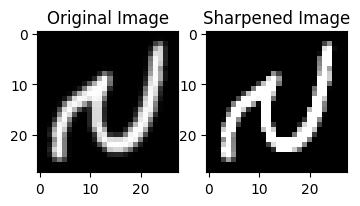

2


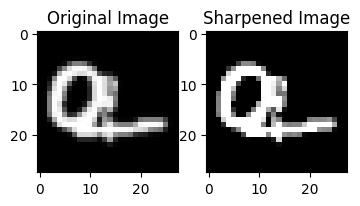

3


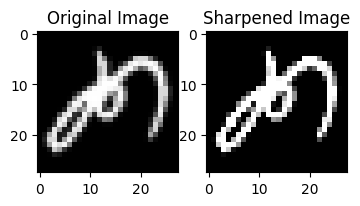

3


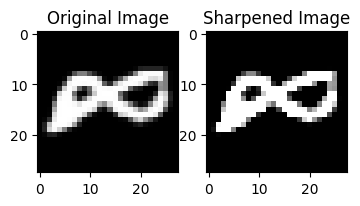

56


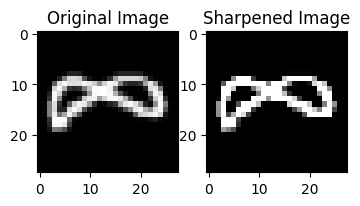

In [ ]:
for i in range(5):  # Display the first 5 examples to demonstrate results of filter Training Dataset
    original_image = train_df["image"][i]
    sharpened_image = traindf["sharpened_image"][i]
    print(test_df["label"][i])
    plt.figure(figsize=(4, 2))
    plt.subplot(1, 2, 1)
    plt.imshow(original_image, cmap='gray')
    plt.title("Original Image")

    plt.subplot(1, 2, 2)
    plt.imshow(sharpened_image, cmap='gray')
    plt.title("Sharpened Image")

    plt.show()

In [ ]:
testdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116323 entries, 0 to 116322
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   image            116323 non-null  object
 1   label            116323 non-null  int64 
 2   sharpened_image  116323 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.7+ MB


In [ ]:
#X: images
#y: labels
X_train, y_train = traindf["sharpened_image"], traindf["label"]
X_test, y_test = testdf["sharpened_image"], testdf["label"]

X_train = traindf["sharpened_image"].to_numpy()
X_train_flat = np.concatenate(X_train).reshape(-1, 28, 28, 1)

X_test = testdf["sharpened_image"].to_numpy()
X_test_flat = np.concatenate(X_test).reshape(-1, 28, 28, 1)

# Convert to float32 and normalize
X_train_flat = X_train_flat.astype('float32') / 255.0
X_test_flat = X_test_flat.astype('float32') / 255.0


In [ ]:
#ONE HOT ENCODING
from tensorflow.keras.utils import to_categorical

num_classes = len(np.unique(y_train))

y_train_one_hot = to_categorical(y_train, num_classes)
y_test_one_hot = to_categorical(y_test, num_classes)

In [ ]:
#MODEL CREATION
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras import backend as K
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import LeakyReLU

In [ ]:
#SHARPENED
from tensorflow.keras.callbacks import EarlyStopping

callback = [EarlyStopping(min_delta = 0.001, patience = 5, verbose = 1)]

batch_size = 128
num_classes = 10
epochs = 15

num_classes = emnist_info.features['label'].num_classes

SHARP = Sequential()

SHARP.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1)))
SHARP.add(LeakyReLU(alpha=0.01))
SHARP.add(MaxPooling2D(pool_size=(2, 2)))

SHARP.add(Conv2D(64, kernel_size=(3, 3)))
SHARP.add(LeakyReLU(alpha=0.01))
SHARP.add(MaxPooling2D(pool_size=(2, 2)))

SHARP.add(Flatten())
SHARP.add(Dense(128))
SHARP.add(LeakyReLU(alpha=0.01))
SHARP.add(Dense(num_classes, activation='softmax'))

SHARP.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

SHARPhist = SHARP.fit(X_train_flat, y_train_one_hot, epochs=epochs, batch_size=64, callbacks = callback, validation_split=0.2)

print("Model Trained")

SHARPscore = SHARP.evaluate(X_test_flat, y_test_one_hot, verbose=0)
print('Test loss:', SHARPscore[0])
print('Test accuracy:', SHARPscore[1])

Epoch 1/15
8725/8725 [==============================] - 88s 10ms/step - loss: 0.7965 - accuracy: 0.7560 - val_loss: 0.4744 - val_accuracy: 0.8354
Epoch 2/15
8725/8725 [==============================] - 87s 10ms/step - loss: 0.4474 - accuracy: 0.8420 - val_loss: 0.4342 - val_accuracy: 0.8473
Epoch 3/15
8725/8725 [==============================] - 86s 10ms/step - loss: 0.4111 - accuracy: 0.8517 - val_loss: 0.4058 - val_accuracy: 0.8535
Epoch 4/15
8725/8725 [==============================] - 87s 10ms/step - loss: 0.3901 - accuracy: 0.8578 - val_loss: 0.3995 - val_accuracy: 0.8559
Epoch 5/15
8725/8725 [==============================] - 86s 10ms/step - loss: 0.3759 - accuracy: 0.8612 - val_loss: 0.3919 - val_accuracy: 0.8574
Epoch 6/15
8725/8725 [==============================] - 86s 10ms/step - loss: 0.3638 - accuracy: 0.8644 - val_loss: 0.3916 - val_accuracy: 0.8588
Epoch 7/15
8725/8725 [==============================] - 86s 10ms/step - loss: 0.3543 - accuracy: 0.8670 - val_loss: 0.3856 -

In [ ]:
#TESTING MODEL WITHOUT PREPROCESSING IMAGES
#X: images
#y: labels
X_train1, y_train1 = train_df["image"], train_df["label"]
X_test1, y_test1 = test_df["image"], test_df["label"]

X_train1 = train_df["image"].to_numpy()
X_train_flat1 = np.concatenate(X_train1).reshape(-1, 28, 28, 1)

X_test1 = test_df["image"].to_numpy()
X_test_flat1 = np.concatenate(X_test1).reshape(-1, 28, 28, 1)

#ONE HOT ENCODING
y_train_one_hot1 = to_categorical(y_train1, num_classes)
y_test_one_hot1 = to_categorical(y_test1, num_classes)

num_classes = emnist_info.features['label'].num_classes

UNSHARP = Sequential()

UNSHARP.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1)))
UNSHARP.add(LeakyReLU(alpha=0.01))
UNSHARP.add(MaxPooling2D(pool_size=(2, 2)))

UNSHARP.add(Conv2D(64, kernel_size=(3, 3)))
UNSHARP.add(LeakyReLU(alpha=0.01))
UNSHARP.add(MaxPooling2D(pool_size=(2, 2)))

UNSHARP.add(Flatten())
UNSHARP.add(Dense(128))
UNSHARP.add(LeakyReLU(alpha=0.01))
UNSHARP.add(Dense(num_classes, activation='softmax'))

UNSHARP.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

UNSHARPhist = UNSHARP.fit(X_train_flat, y_train_one_hot, epochs=epochs, batch_size=64, callbacks = callback, validation_split=0.2)

print("Model Trained")

UNSHARPscore = UNSHARP.evaluate(X_test_flat, y_test_one_hot, verbose=0)
print('Test loss:', UNSHARPscore[0])
print('Test accuracy:', UNSHARPscore[1])

Epoch 1/15
8725/8725 [==============================] - 88s 10ms/step - loss: 0.8082 - accuracy: 0.7538 - val_loss: 0.4754 - val_accuracy: 0.8348
Epoch 2/15
8725/8725 [==============================] - 86s 10ms/step - loss: 0.4465 - accuracy: 0.8423 - val_loss: 0.4279 - val_accuracy: 0.8477
Epoch 3/15
8725/8725 [==============================] - 86s 10ms/step - loss: 0.4107 - accuracy: 0.8515 - val_loss: 0.4063 - val_accuracy: 0.8544
Epoch 4/15
8725/8725 [==============================] - 86s 10ms/step - loss: 0.3908 - accuracy: 0.8578 - val_loss: 0.4019 - val_accuracy: 0.8544
Epoch 5/15
8725/8725 [==============================] - 87s 10ms/step - loss: 0.3772 - accuracy: 0.8610 - val_loss: 0.3935 - val_accuracy: 0.8592
Epoch 6/15
8725/8725 [==============================] - 87s 10ms/step - loss: 0.3660 - accuracy: 0.8640 - val_loss: 0.3862 - val_accuracy: 0.8596
Epoch 7/15
8725/8725 [==============================] - 87s 10ms/step - loss: 0.3563 - accuracy: 0.8668 - val_loss: 0.3944 -

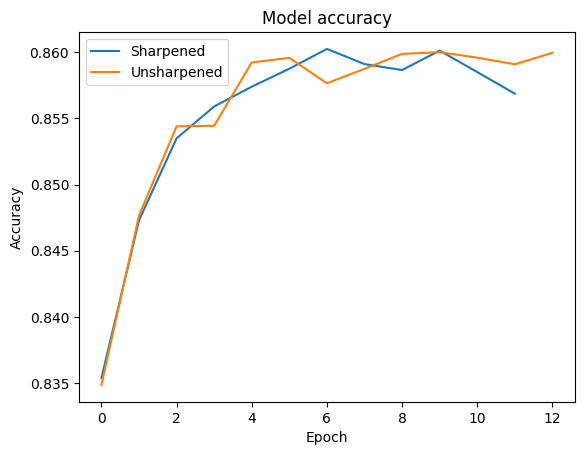

In [ ]:
plt.plot(SHARPhist.history['val_accuracy'])
plt.plot(UNSHARPhist.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Sharpened', 'Unsharpened'], loc='upper left')
plt.show()

In [ ]:
#
from tensorflow.keras.callbacks import EarlyStopping

callback = [EarlyStopping(min_delta = 0.001, patience = 5, verbose = 1)]
batch_size = 128
num_classes = 10
epochs = 30

num_classes = emnist_info.features['label'].num_classes

model = Sequential()

model.add(Conv2D(64, (3,3), input_shape = (28, 28, 1)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add (Flatten())
model.add (Dense(64))
model.add (Activation("relu"))

model.add (Dense(32))
model.add (Activation("relu"))


model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Assuming you have X_train_flat, y_train_one_hot, X_test_flat, and y_test_one_hot
X_train, X_val, y_train, y_val = train_test_split(X_train_flat, y_train_one_hot, test_size=0.2, random_state=42)

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, callbacks = callback, validation_data=(X_val, y_val))

print("Model Trained")

score = model.evaluate(X_test_flat, y_test_one_hot, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/30
4363/4363 [==============================] - 217s 49ms/step - loss: 2.2454 - accuracy: 0.3919 - val_loss: 1.0262 - val_accuracy: 0.6800
Epoch 2/30
4363/4363 [==============================] - 210s 48ms/step - loss: 0.8852 - accuracy: 0.7176 - val_loss: 0.7993 - val_accuracy: 0.7426
Epoch 3/30
4363/4363 [==============================] - 223s 51ms/step - loss: 0.7223 - accuracy: 0.7625 - val_loss: 0.6809 - val_accuracy: 0.7750
Epoch 4/30
4363/4363 [==============================] - 208s 48ms/step - loss: 0.6496 - accuracy: 0.7832 - val_loss: 0.6237 - val_accuracy: 0.7912
Epoch 5/30
4363/4363 [==============================] - 208s 48ms/step - loss: 0.6097 - accuracy: 0.7949 - val_loss: 0.6006 - val_accuracy: 0.7981
Epoch 6/30
4363/4363 [==============================] - 209s 48ms/step - loss: 0.5847 - accuracy: 0.8017 - val_loss: 0.5951 - val_accuracy: 0.8009
Epoch 7/30
4363/4363 [==============================] - 210s 48ms/step - loss: 0.5666 - accuracy: 0.8065 - val_loss: 0

In [ ]:
X_train, y_train = traindf["sharpened_image"], traindf["label"]
X_test, y_test = testdf["sharpened_image"], testdf["label"]

X_train = traindf["sharpened_image"].to_numpy()
X_train_flat = np.concatenate(X_train).reshape(-1, 28, 28, 1)

X_test = testdf["sharpened_image"].to_numpy()
X_test_flat = np.concatenate(X_test).reshape(-1, 28, 28, 1)

# Convert to float32 and normalize
X_train_flat = X_train_flat.astype('float32') / 255.0
X_test_flat = X_test_flat.astype('float32') / 255.0
batch_size = 128
num_classes = 10
epochs = 30

num_classes = emnist_info.features['label'].num_classes

xmodel = Sequential()

xmodel.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1)))
xmodel.add(LeakyReLU(alpha=0.01))
xmodel.add(MaxPooling2D(pool_size=(2, 2)))

xmodel.add(Conv2D(64, kernel_size=(3, 3)))
xmodel.add(LeakyReLU(alpha=0.01))
xmodel.add(MaxPooling2D(pool_size=(2, 2)))

xmodel.add(Flatten())
xmodel.add(Dense(128))
xmodel.add(LeakyReLU(alpha=0.01))
xmodel.add(Dropout(0.5))

xmodel.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

cnnhist = xmodel.fit(X_train_flat, y_train_one_hot, epochs=epochs, batch_size = 64, validation_split=0.2)

print("Model Trained")

score = xmodel.evaluate(X_test_flat, y_test_one_hot, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/30


ValueError: ignored

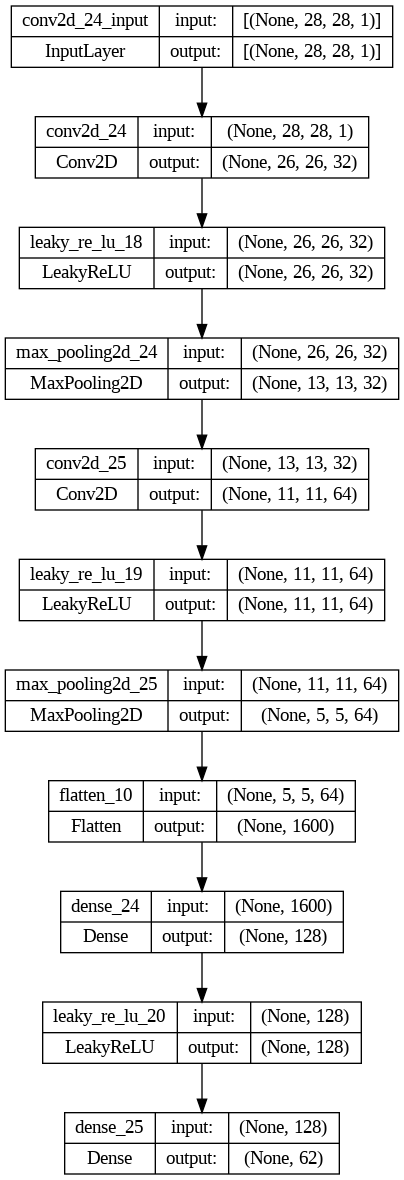

In [ ]:
from keras.utils import plot_model

plot_model(xmodel, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

3636/3636 [==============================] - 17s 5ms/step


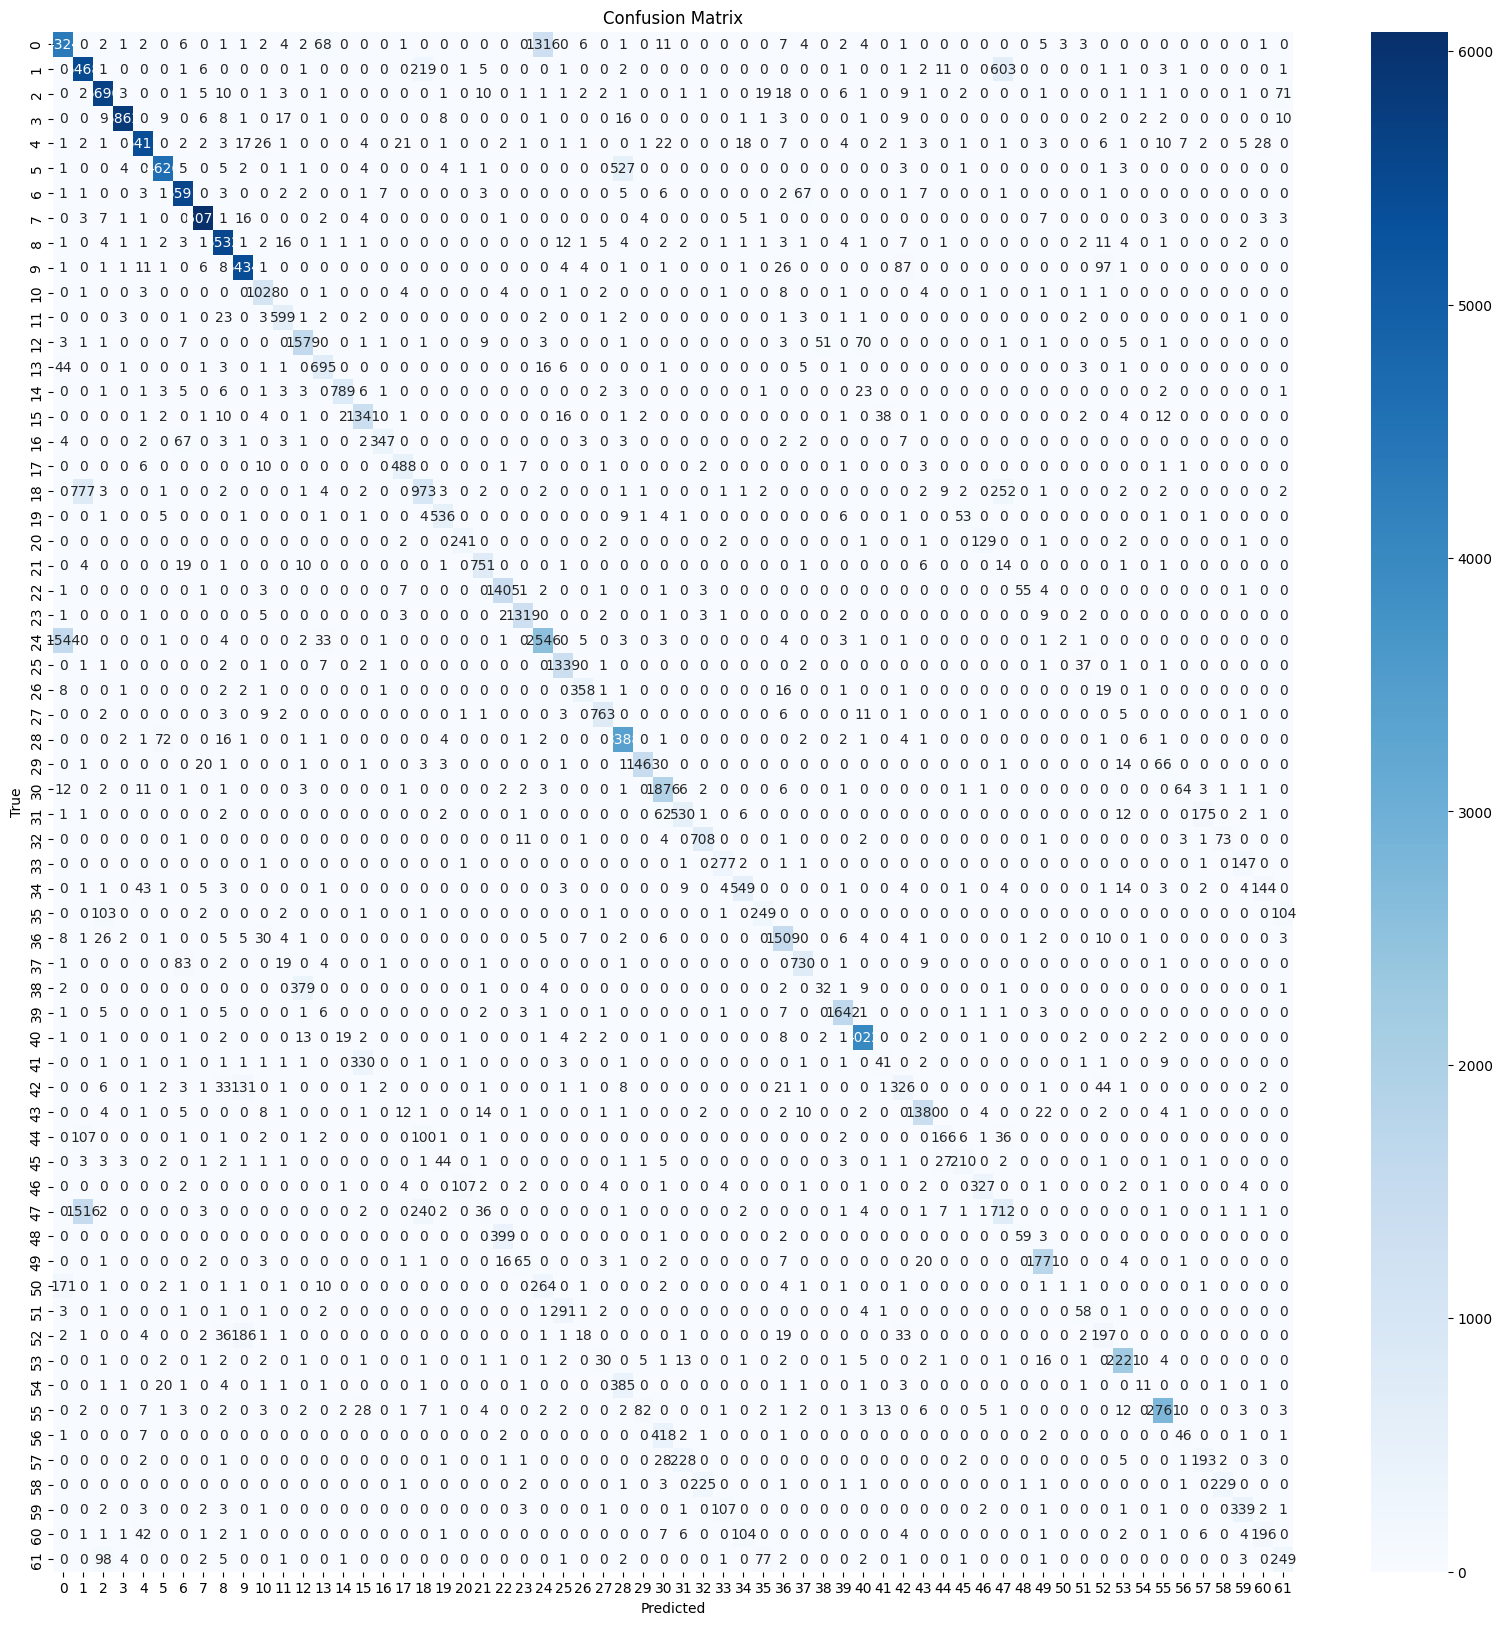

In [ ]:
from sklearn.metrics import confusion_matrix
class_labels  = {
    i: str(i) for i in range(62)
}

prob=xmodel.predict(X_test_flat)
y_pred=np.argmax(prob,axis=-1)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(20, 20))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')


tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks + 0.5, [class_labels[i] for i in range(len(class_labels))])
plt.yticks(tick_marks + 0.5, [class_labels[i] for i in range(len(class_labels))])

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

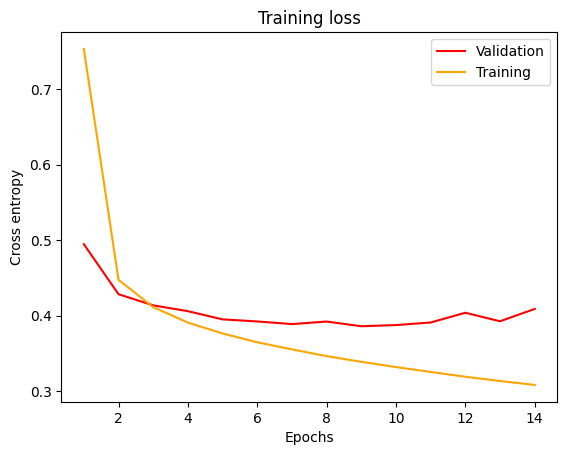

In [ ]:
val_losses= cnnhist.history["val_loss"]
train_losses= cnnhist.history["loss"]

epochs = range(1, len(val_losses) + 1)

plt.figure()
plt.title("Training loss")
plt.plot(epochs,val_losses,c="red",label="Validation")
plt.plot(epochs,train_losses,c="orange",label="Training")
plt.xlabel("Epochs")
plt.ylabel("Cross entropy")
plt.legend()

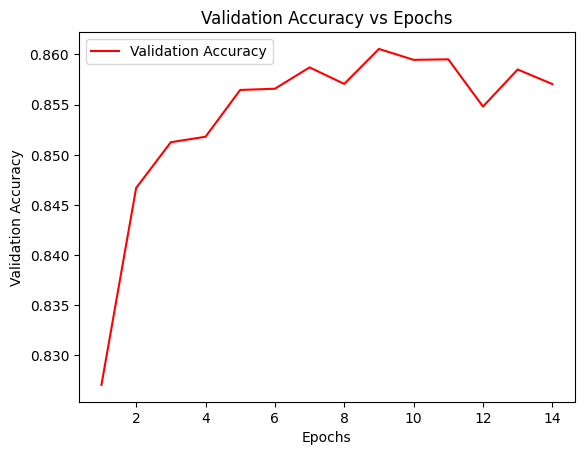

In [ ]:
val_accuracy= cnnhist.history["val_accuracy"]

epochs = range(1, len(val_accuracy) + 1)

plt.figure()
plt.title("Validation Accuracy vs Epochs")
plt.plot(epochs,val_accuracy,c="red",label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()

In [ ]:
print(cnnhist.history["val_accuracy"])

[0.8270612359046936, 0.8466905951499939, 0.8512540459632874, 0.8517985343933105, 0.856462299823761, 0.8565840721130371, 0.8587117791175842, 0.8570640683174133, 0.8605529069900513, 0.8594639897346497, 0.8595141172409058, 0.8548073768615723, 0.8585039973258972, 0.8570497035980225]


In [ ]:
X_train, y_train = traindf["sharpened_image"], traindf["label"]
X_test, y_test = testdf["sharpened_image"], testdf["label"]

X_train = traindf["sharpened_image"].to_numpy()
X_train_flat = np.concatenate(X_train).reshape(-1, 28, 28, 1)

X_test = testdf["sharpened_image"].to_numpy()
X_test_flat = np.concatenate(X_test).reshape(-1, 28, 28, 1)

# Convert to float32 and normalize
X_train_flat = X_train_flat.astype('float32') / 255.0
X_test_flat = X_test_flat.astype('float32') / 255.0
callback = [EarlyStopping(min_delta = 0.001, patience = 5, verbose = 1)]

batch_size = 128
num_classes = 10
epochs = 30

num_classes = emnist_info.features['label'].num_classes

xmodel = Sequential()

xmodel.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1)))
xmodel.add(LeakyReLU(alpha=0.01))
xmodel.add(MaxPooling2D(pool_size=(2, 2)))

xmodel.add(Conv2D(64, kernel_size=(3, 3)))
xmodel.add(LeakyReLU(alpha=0.01))
xmodel.add(MaxPooling2D(pool_size=(2, 2)))

xmodel.add(Flatten())
xmodel.add(Dense(128))
xmodel.add(LeakyReLU(alpha=0.01))
xmodel.add(Dropout(0.5))

xmodel.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

cnnhist = xmodel.fit(X_train_flat, y_train_one_hot, epochs=epochs, batch_size = 64, validation_split=0.2)

print("Model Trained")

score = xmodel.evaluate(X_test_flat, y_test_one_hot, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
#OPTIMIZERS
X_train1, y_train1 = train_df["image"], train_df["label"]
X_test1, y_test1 = test_df["image"], test_df["label"]

X_train1 = train_df["image"].to_numpy()
X_train_flat1 = np.concatenate(X_train1).reshape(-1, 28, 28, 1)

X_test1 = test_df["image"].to_numpy()
X_test_flat1 = np.concatenate(X_test1).reshape(-1, 28, 28, 1)

#ONE HOT ENCODING
y_train_one_hot1 = to_categorical(y_train1, num_classes)
y_test_one_hot1 = to_categorical(y_test1, num_classes)

num_classes = emnist_info.features['label'].num_classes

NADAM = Sequential()

NADAM.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1)))
NADAM.add(LeakyReLU(alpha=0.01))
NADAM.add(MaxPooling2D(pool_size=(2, 2)))

NADAM.add(Conv2D(64, kernel_size=(3, 3)))
NADAM.add(LeakyReLU(alpha=0.01))
NADAM.add(MaxPooling2D(pool_size=(2, 2)))

NADAM.add(Flatten())
NADAM.add(Dense(128))
NADAM.add(LeakyReLU(alpha=0.01))
NADAM.add(Dense(num_classes, activation='softmax'))

NADAM.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

NADAMhist = NADAM.fit(X_train_flat, y_train_one_hot, epochs=epochs, batch_size=64, callbacks = callback, validation_split=0.2)

print("Model Trained")

NADAMscore = NADAM.evaluate(X_test_flat, y_test_one_hot, verbose=0)
print('Test loss:', NADAMscore[0])
print('Test accuracy:', NADAMscore[1])

Epoch 1/15
8725/8725 [==============================] - 89s 10ms/step - loss: 0.7443 - accuracy: 0.7695 - val_loss: 0.4790 - val_accuracy: 0.8342
Epoch 2/15
8725/8725 [==============================] - 87s 10ms/step - loss: 0.4436 - accuracy: 0.8431 - val_loss: 0.4285 - val_accuracy: 0.8476
Epoch 3/15
8725/8725 [==============================] - 87s 10ms/step - loss: 0.4097 - accuracy: 0.8521 - val_loss: 0.4166 - val_accuracy: 0.8501
Epoch 4/15
8725/8725 [==============================] - 87s 10ms/step - loss: 0.3907 - accuracy: 0.8571 - val_loss: 0.4009 - val_accuracy: 0.8558
Epoch 5/15
8725/8725 [==============================] - 87s 10ms/step - loss: 0.3762 - accuracy: 0.8612 - val_loss: 0.3998 - val_accuracy: 0.8568
Epoch 6/15
8725/8725 [==============================] - 87s 10ms/step - loss: 0.3653 - accuracy: 0.8639 - val_loss: 0.3917 - val_accuracy: 0.8585
Epoch 7/15
8725/8725 [==============================] - 87s 10ms/step - loss: 0.3559 - accuracy: 0.8667 - val_loss: 0.3884 -

In [ ]:
#SGD TEST
X_train1, y_train1 = train_df["image"], train_df["label"]
X_test1, y_test1 = test_df["image"], test_df["label"]

X_train1 = train_df["image"].to_numpy()
X_train_flat1 = np.concatenate(X_train1).reshape(-1, 28, 28, 1)

X_test1 = test_df["image"].to_numpy()
X_test_flat1 = np.concatenate(X_test1).reshape(-1, 28, 28, 1)

#ONE HOT ENCODING
y_train_one_hot1 = to_categorical(y_train1, num_classes)
y_test_one_hot1 = to_categorical(y_test1, num_classes)

num_classes = emnist_info.features['label'].num_classes

SGD = Sequential()

SGD.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1)))
SGD.add(LeakyReLU(alpha=0.01))
SGD.add(MaxPooling2D(pool_size=(2, 2)))

SGD.add(Conv2D(64, kernel_size=(3, 3)))
SGD.add(LeakyReLU(alpha=0.01))
SGD.add(MaxPooling2D(pool_size=(2, 2)))

SGD.add(Flatten())
SGD.add(Dense(128))
SGD.add(LeakyReLU(alpha=0.01))
SGD.add(Dense(num_classes, activation='softmax'))

SGD.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

SGDhist = SGD.fit(X_train_flat, y_train_one_hot, epochs=epochs, batch_size=64, callbacks = callback, validation_split=0.2)

print("Model Trained")

SGDscore = SGD.evaluate(X_test_flat, y_test_one_hot, verbose=0)
print('Test loss:', SGDscore[0])
print('Test accuracy:', SGDscore[1])

Epoch 1/15
8725/8725 [==============================] - 88s 10ms/step - loss: 3.7010 - accuracy: 0.0530 - val_loss: 3.6845 - val_accuracy: 0.0546
Epoch 2/15
8725/8725 [==============================] - 86s 10ms/step - loss: 3.6857 - accuracy: 0.0536 - val_loss: 3.6846 - val_accuracy: 0.0499
Epoch 3/15
8725/8725 [==============================] - 86s 10ms/step - loss: 3.6855 - accuracy: 0.0537 - val_loss: 3.6846 - val_accuracy: 0.0546
Epoch 4/15
8725/8725 [==============================] - 86s 10ms/step - loss: 3.6853 - accuracy: 0.0539 - val_loss: 3.6842 - val_accuracy: 0.0546
Epoch 5/15
8725/8725 [==============================] - 87s 10ms/step - loss: 3.6852 - accuracy: 0.0540 - val_loss: 3.6842 - val_accuracy: 0.0546
Epoch 6/15
8725/8725 [==============================] - 85s 10ms/step - loss: 3.6849 - accuracy: 0.0544 - val_loss: 3.6837 - val_accuracy: 0.0546
Epoch 6: early stopping
Model Trained
Test loss: 3.679262399673462
Test accuracy: 0.0544174425303936


In [ ]:
#RMS TEST
from keras.optimizers import RMSprop

X_train1, y_train1 = train_df["image"], train_df["label"]
X_test1, y_test1 = test_df["image"], test_df["label"]

X_train1 = train_df["image"].to_numpy()
X_train_flat1 = np.concatenate(X_train1).reshape(-1, 28, 28, 1)

X_test1 = test_df["image"].to_numpy()
X_test_flat1 = np.concatenate(X_test1).reshape(-1, 28, 28, 1)

#ONE HOT ENCODING
y_train_one_hot1 = to_categorical(y_train1, num_classes)
y_test_one_hot1 = to_categorical(y_test1, num_classes)

num_classes = emnist_info.features['label'].num_classes

RMS = Sequential()

RMS.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1)))
RMS.add(LeakyReLU(alpha=0.01))
RMS.add(MaxPooling2D(pool_size=(2, 2)))

RMS.add(Conv2D(64, kernel_size=(3, 3)))
RMS.add(LeakyReLU(alpha=0.01))
RMS.add(MaxPooling2D(pool_size=(2, 2)))

RMS.add(Flatten())
RMS.add(Dense(128))
RMS.add(LeakyReLU(alpha=0.01))
RMS.add(Dense(num_classes, activation='softmax'))

optimizer = RMSprop(lr=0.001, rho=0.9)
RMS.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

RMShist = RMS.fit(X_train_flat, y_train_one_hot, epochs=epochs, batch_size=64, callbacks = callback, validation_split=0.2)

print("Model Trained")

RMSscore = RMS.evaluate(X_test_flat, y_test_one_hot, verbose=0)
print('Test loss:', RMSscore[0])
print('Test accuracy:', RMSscore[1])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/15
8725/8725 [==============================] - 89s 10ms/step - loss: 0.7971 - accuracy: 0.7578 - val_loss: 0.5674 - val_accuracy: 0.8056
Epoch 2/15
8725/8725 [==============================] - 88s 10ms/step - loss: 0.4831 - accuracy: 0.8358 - val_loss: 0.5877 - val_accuracy: 0.8258
Epoch 3/15
8725/8725 [==============================] - 88s 10ms/step - loss: 0.4774 - accuracy: 0.8390 - val_loss: 0.5027 - val_accuracy: 0.8331
Epoch 4/15
8725/8725 [==============================] - 88s 10ms/step - loss: 0.4798 - accuracy: 0.8390 - val_loss: 0.5770 - val_accuracy: 0.8265
Epoch 5/15
8725/8725 [==============================] - 87s 10ms/step - loss: 0.4802 - accuracy: 0.8392 - val_loss: 0.5306 - val_accuracy: 0.8406
Epoch 6/15
8725/8725 [==============================] - 89s 10ms/step - loss: 0.4775 - accuracy: 0.8398 - val_loss: 0.5967 - val_accuracy: 0.8095
Epoch 7/15
8725/8725 [==============================] - 91s 10ms/step - loss: 0.4754 - accuracy: 0.8409 - val_loss: 0.5854 -

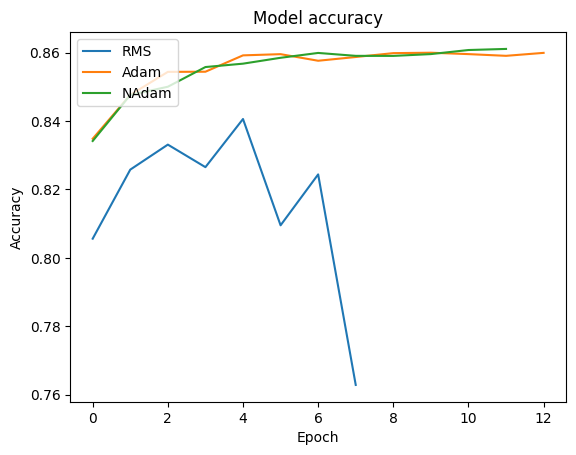

In [ ]:
plt.plot(RMShist.history['val_accuracy'])
plt.plot(UNSHARPhist.history['val_accuracy'])
plt.plot(NADAMhist.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['RMS', 'Adam', 'NAdam'], loc='upper left')
plt.show()

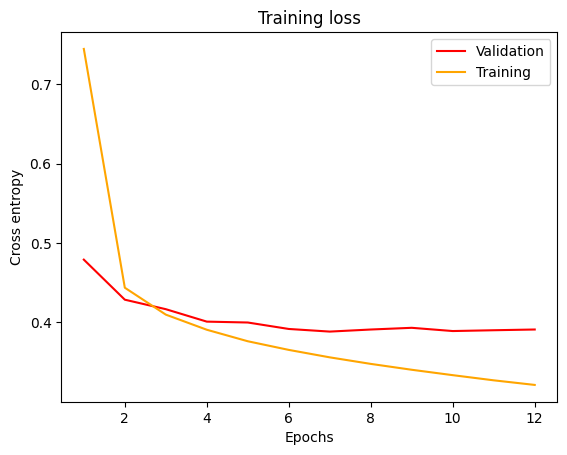

In [ ]:
val_losses= NADAMhist.history["val_loss"]
train_losses= NADAMhist.history["loss"]

epochs = range(1, len(val_losses) + 1)

plt.figure()
plt.title("Training loss")
plt.plot(epochs,val_losses,c="red",label="Validation")
plt.plot(epochs,train_losses,c="orange",label="Training")
plt.xlabel("Epochs")
plt.ylabel("Cross entropy")
plt.legend()

In [ ]:
#SIMPLE MODEL
from keras.layers import Dropout
X_train1, y_train1 = train_df["image"], train_df["label"]
X_test1, y_test1 = test_df["image"], test_df["label"]

X_train1 = train_df["image"].to_numpy()
X_train_flat1 = np.concatenate(X_train1).reshape(-1, 28, 28, 1)

X_test1 = test_df["image"].to_numpy()
X_test_flat1 = np.concatenate(X_test1).reshape(-1, 28, 28, 1)

#ONE HOT ENCODING
y_train_one_hot1 = to_categorical(y_train1, num_classes)
y_test_one_hot1 = to_categorical(y_test1, num_classes)

num_classes = emnist_info.features['label'].num_classes

# Create the simpler model
SIMPLE = Sequential()

SIMPLE.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1)))
SIMPLE.add(LeakyReLU(alpha=0.01))
SIMPLE.add(MaxPooling2D(pool_size=(2, 2)))

SIMPLE.add(Flatten())
SIMPLE.add(Dense(64))
SIMPLE.add(LeakyReLU(alpha=0.01))
SIMPLE.add(Dense(num_classes, activation='softmax'))

SIMPLE.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

# Train the simpler model
SIMPLEhist = SIMPLE.fit(X_train_flat, y_train_one_hot, epochs=15, batch_size=64, callbacks=callback, validation_split=0.2)

print("Model Trained")

SIMPLEscore = SIMPLE.evaluate(X_test_flat, y_test_one_hot, verbose=0)
print('Test loss:', SIMPLEscore[0])
print('Test accuracy:', SIMPLEscore[1])

Epoch 1/15
8725/8725 [==============================] - 72s 8ms/step - loss: 1.6559 - accuracy: 0.5452 - val_loss: 0.9008 - val_accuracy: 0.7312
Epoch 2/15
8725/8725 [==============================] - 69s 8ms/step - loss: 1.1951 - accuracy: 0.6514 - val_loss: 0.7781 - val_accuracy: 0.7603
Epoch 3/15
8725/8725 [==============================] - 70s 8ms/step - loss: 1.0972 - accuracy: 0.6749 - val_loss: 0.7243 - val_accuracy: 0.7721
Epoch 4/15
8725/8725 [==============================] - 78s 9ms/step - loss: 1.0322 - accuracy: 0.6900 - val_loss: 0.6815 - val_accuracy: 0.7836
Epoch 5/15
8725/8725 [==============================] - 75s 9ms/step - loss: 0.9751 - accuracy: 0.7042 - val_loss: 0.6370 - val_accuracy: 0.7945
Epoch 6/15
8725/8725 [==============================] - 76s 9ms/step - loss: 0.9086 - accuracy: 0.7207 - val_loss: 0.5979 - val_accuracy: 0.8048
Epoch 7/15
8725/8725 [==============================] - 74s 8ms/step - loss: 0.8602 - accuracy: 0.7330 - val_loss: 0.5639 - val_ac

In [ ]:
#DROP MODEL
from keras.layers import Dropout
X_train1, y_train1 = train_df["image"], train_df["label"]
X_test1, y_test1 = test_df["image"], test_df["label"]

X_train1 = train_df["image"].to_numpy()
X_train_flat1 = np.concatenate(X_train1).reshape(-1, 28, 28, 1)

X_test1 = test_df["image"].to_numpy()
X_test_flat1 = np.concatenate(X_test1).reshape(-1, 28, 28, 1)

#ONE HOT ENCODING
y_train_one_hot1 = to_categorical(y_train1, num_classes)
y_test_one_hot1 = to_categorical(y_test1, num_classes)

num_classes = emnist_info.features['label'].num_classes

# Create the simpler model
DROP = Sequential()

DROP.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1)))
DROP.add(LeakyReLU(alpha=0.01))
DROP.add(MaxPooling2D(pool_size=(2, 2)))
DROP.add(Dropout(0.25))

DROP.add(Conv2D(64, kernel_size=(3, 3)))
DROP.add(LeakyReLU(alpha=0.01))
DROP.add(MaxPooling2D(pool_size=(2, 2)))
DROP.add(Dropout(0.25))

DROP.add(Flatten())
DROP.add(Dense(128))
DROP.add(LeakyReLU(alpha=0.01))
DROP.add(Dropout(0.5))
DROP.add(Dense(num_classes, activation='softmax'))

DROP.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

# Train the model
DROPhist = DROP.fit(X_train_flat, y_train_one_hot, epochs=15, batch_size=64, callbacks=callback, validation_split=0.2)

print("Model Trained")

DROPscore = DROP.evaluate(X_test_flat, y_test_one_hot, verbose=0)
print('Test loss:', DROPscore[0])
print('Test accuracy:', DROPscore[1])

Epoch 1/15
8725/8725 [==============================] - 114s 13ms/step - loss: 1.1386 - accuracy: 0.6670 - val_loss: 0.5339 - val_accuracy: 0.8181
Epoch 2/15
8725/8725 [==============================] - 109s 13ms/step - loss: 0.6767 - accuracy: 0.7801 - val_loss: 0.4799 - val_accuracy: 0.8338
Epoch 3/15
8725/8725 [==============================] - 110s 13ms/step - loss: 0.6215 - accuracy: 0.7953 - val_loss: 0.4571 - val_accuracy: 0.8400
Epoch 4/15
8725/8725 [==============================] - 110s 13ms/step - loss: 0.5909 - accuracy: 0.8046 - val_loss: 0.4424 - val_accuracy: 0.8436
Epoch 5/15
8725/8725 [==============================] - 110s 13ms/step - loss: 0.5686 - accuracy: 0.8102 - val_loss: 0.4323 - val_accuracy: 0.8459
Epoch 6/15
8725/8725 [==============================] - 111s 13ms/step - loss: 0.5497 - accuracy: 0.8150 - val_loss: 0.4305 - val_accuracy: 0.8457
Epoch 7/15
8725/8725 [==============================] - 110s 13ms/step - loss: 0.5367 - accuracy: 0.8187 - val_loss: 0

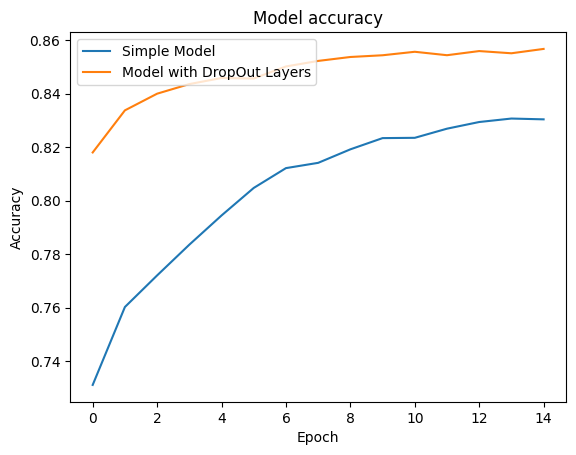

In [ ]:
plt.plot(SIMPLEhist.history['val_accuracy'])
plt.plot(DROPhist.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Simple Model', 'Model with DropOut Layers'], loc='upper left')
plt.show()

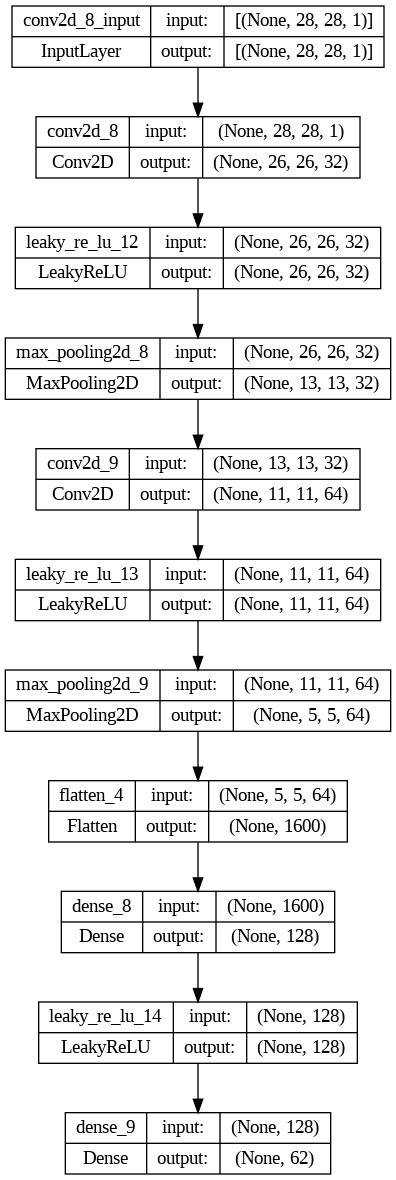

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(NADAM, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
label_counts = train_df['label'].value_counts()

# Iterate through unique values and print frequencies
for label, count in zip(label_counts.index, label_counts.values):
    print(f"Label {label}: {count} occurrences")

Label 1: 38374 occurrences
Label 7: 35754 occurrences
Label 3: 35143 occurrences
Label 0: 34585 occurrences
Label 6: 34232 occurrences
Label 2: 34203 occurrences
Label 8: 33946 occurrences
Label 9: 33847 occurrences
Label 4: 33535 occurrences
Label 5: 31416 occurrences
Label 24: 24983 occurrences
Label 40: 24631 occurrences
Label 28: 20764 occurrences
Label 55: 18262 occurrences
Label 47: 15318 occurrences
Label 53: 14105 occurrences
Label 30: 12602 occurrences
Label 18: 11946 occurrences
Label 49: 11418 occurrences
Label 39: 10177 occurrences
Label 12: 10094 occurrences
Label 36: 10033 occurrences
Label 29: 9820 occurrences
Label 15: 9182 occurrences
Label 22: 9002 occurrences
Label 43: 8738 occurrences
Label 25: 8347 occurrences
Label 23: 8237 occurrences
Label 10: 6407 occurrences
Label 37: 5159 occurrences
Label 21: 5076 occurrences
Label 27: 5073 occurrences
Label 14: 4934 occurrences
Label 34: 4743 occurrences
Label 32: 4695 occurrences
Label 31: 4637 occurrences
Label 13: 4562 o